In [1]:
##CLIM 680 Assignment #1A:
##Create a Jupyter noteboook with documentation regarding the datset in question
##Read this dataset into the notebook
##Make a contour plot of the first time step

In [2]:
##The dataset I have chosen for this analysis will be
##ocean surface temperature data (tos) taken from 
##pre-industrial model runs contained in the 
##CMIP5 dataset.
##Due to the multiude of models available for this dataset, only
##GFDL's CM3 model will be considered.

##This dataset is contained on the COLA server at:
##/shared/cmip5/data/piControl/ocean/mon/Omon/tos/NOAA-GFDL.GFDL-CM3/r1i1p1
##The data is stored in 100 files containing 5 years of data, for a total run length of 500 years

##The data is stored using the NetCDF file format

In [3]:
##Import necessary python libraries
import warnings;

import numpy as np; ##Numerical Calculations
import xarray as xr; ##Read netcdf files
import pandas as pd;
import matplotlib.pyplot as plt; ##Plotting

import cartopy.crs as ccrs;
import cartopy.mpl.ticker as cticker;
from cartopy.util import add_cyclic_point

In [4]:
## Read dataset into notebook   
path = '/shared/cmip5/data/piControl/ocean/mon/Omon/tos/NOAA-GFDL.GFDL-CM3/r1i1p1/';
file = 'tos_Omon_GFDL-CM3_piControl_r1i1p1_*.nc';
#dataset = xr.open_dataset( path + file )
dataset = xr.open_mfdataset( ( path + file ), concat_dim = 'time' );
print( dataset );

/opt/anaconda3/lib/python3.7/site-packages/xarray/coding/times.py:465: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """
/opt/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global di

<xarray.Dataset>
Dimensions:       (bnds: 2, rlat: 200, rlon: 360, time: 6000, vertices: 4)
Coordinates:
    lon           (rlat, rlon) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
    lat           (rlat, rlon) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
  * vertices      (vertices) int32 0 1 2 3
  * rlat          (rlat) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
  * bnds          (bnds) float64 1.0 2.0
  * rlon          (rlon) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * time          (time) object 0001-01-16 12:00:00 ... 0500-12-16 12:00:00
Data variables:
    average_DT    (time) timedelta64[ns] dask.array<chunksize=(60,), meta=np.ndarray>
    average_T1    (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    average_T2    (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    tos           (time, rlat, rlon) float32 dask.array<chunksize=(60, 200, 360), meta=np.ndarray>
    time_bnds     (time, bnds) object das

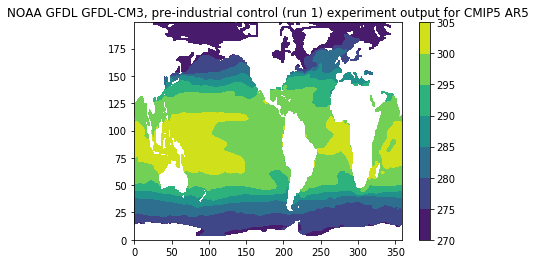

In [5]:
##Make a contour plot of the first time.
plt.contourf( dataset['tos'][0,:,:] );
plt.title( dataset.title );
plt.colorbar();


/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


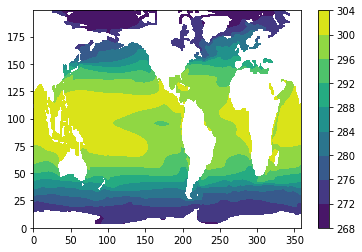

In [7]:
dataset_mean = dataset.mean( dim = 'time' );
plt.contourf( dataset_mean['tos'] );
plt.colorbar();

/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


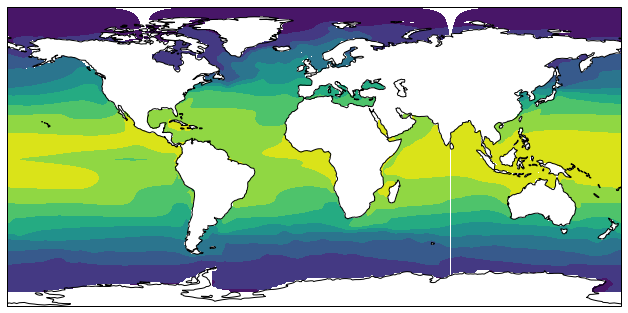

In [9]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

#Make a filled contour plot
ax.contourf( dataset['lon'], dataset['lat'], dataset_mean['tos'], transform = ccrs.PlateCarree() );

##Add coastlines
ax.coastlines();

/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


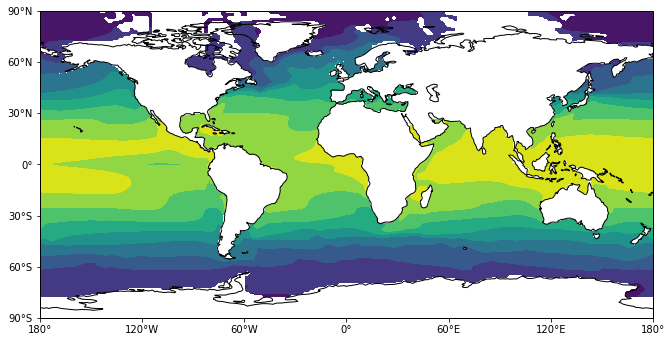

In [30]:
#Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

##Add cyclic point to data
#data = dataset_mean['tos'];
data, lons = add_cyclic_point( dataset_mean['tos'], coord = dataset_mean['rlon'] );

#Make a filled contour plot
cs = ax.contourf( lons, dataset_mean['rlat'], data, transform = ccrs.PlateCarree() );

#Add coastlines
ax.coastlines();

#Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

#Define the yticks for the latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

##Add colorbar
cbar = plt.colorbar( cs );

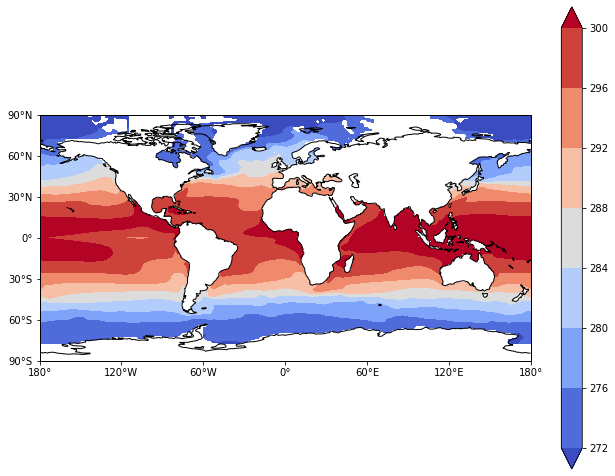

In [31]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

#Make a filled contour plot
cs = ax.contourf( lons, dataset_mean['rlat'], data, transform = ccrs.PlateCarree(), cmap = 'coolwarm', extend = 'both' );

##Add coastlines
ax.coastlines();

##Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

##Define the yticks for latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

##Add colorbar
cbar = plt.colorbar( cs );

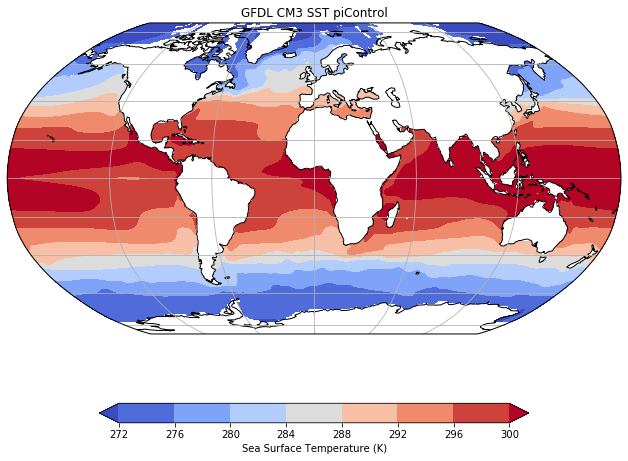

In [32]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.Robinson() );

#Make a filled contour plot
cs = ax.contourf( lons, dataset_mean['rlat'], data, transform = ccrs.PlateCarree(), cmap = 'coolwarm', extend = 'both' );

#Add coastlines
ax.coastlines();

#Add gridlines
ax.gridlines();

#Add colorbar
cbar = plt.colorbar( cs, shrink = 0.7, orientation = 'horizontal', label = 'Sea Surface Temperature (K)' );

#Add title
plt.title( 'GFDL CM3 SST piControl' );